In [1]:
from neuron import h, rxd
from neuron.units import ms, mV

In [2]:
print(h.celsius)

6.3


In [3]:
# define sections
soma = h.Section(name="soma")
papic = h.Section(name="proxApical")

In [4]:
papic.connect(soma)

proxApical

In [5]:
# topology() function displays the topological structure of the entire model indicating which section are connected to which sections, where they are connected, and how many segments each section is divident into
h.topology()


|-|       soma(0-1)
   `|       proxApical(0-1)



1.0

In [6]:
# displays a dictionary structure of the propertiese of the section
soma.psection()

{'point_processes': {},
 'density_mechs': {},
 'ions': {},
 'morphology': {'L': 100.0,
  'diam': [500.0],
  'pts3d': [],
  'parent': None,
  'trueparent': None},
 'nseg': 1,
 'Ra': 35.4,
 'cm': [1.0],
 'regions': set(),
 'species': set(),
 'name': 'soma',
 'hoc_internal_name': '__nrnsec_0x561fa7f15460',
 'cell': None}

In [7]:
soma.psection()["morphology"]["L"]

100.0

In [8]:
soma.L

100.0

In [9]:
soma.diam

500.0

In [10]:
soma.L = 20
soma.diam = 20

In [11]:
dir(soma)  #methods associated with the objecct

['L',
 'Ra',
 '__call__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'allseg',
 'arc3d',
 'cell',
 'children',
 'connect',
 'diam3d',
 'disconnect',
 'has_membrane',
 'hname',
 'hoc_internal_name',
 'insert',
 'is_pysec',
 'n3d',
 'name',
 'nseg',
 'orientation',
 'parentseg',
 'psection',
 'pt3dadd',
 'pt3dchange',
 'pt3dclear',
 'pt3dinsert',
 'pt3dremove',
 'pt3dstyle',
 'push',
 'rallbranch',
 'same',
 'spine3d',
 'subtree',
 'trueparentseg',
 'uninsert',
 'wholetree',
 'x3d',
 'y3d',
 'z3d']

In [12]:
soma.insert("hh") #inserting ion channels

soma

In [13]:
print("type(soma) = {}".format(type(soma))) #section
print("type(soma(0.5)) = {}".format(type(soma(0.5)))) #segment: section(loc)

type(soma) = <class 'nrn.Section'>
type(soma(0.5)) = <class 'nrn.Segment'>


In [14]:
mech = soma(0.5).hh
print(dir(mech))

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'el', 'gk', 'gkbar', 'gl', 'gna', 'gnabar', 'h', 'hinf', 'htau', 'il', 'is_ion', 'm', 'minf', 'mtau', 'n', 'name', 'ninf', 'ntau', 'segment']


In [15]:
print(mech.gkbar)

0.036


In [16]:
print(soma(0.5).hh.gkbar)

0.036


In [17]:
print("type(soma(1)) = {}".format(type(soma(1))))

type(soma(1)) = <class 'nrn.Segment'>


In [18]:
# inserting a stimulus

In [19]:
iclamp = h.IClamp(soma(0.5))

In [20]:
print([item for item in dir(iclamp) if not item.startswith("__")])

['amp', 'baseattr', 'delay', 'dur', 'get_loc', 'get_segment', 'has_loc', 'hname', 'hocobjptr', 'i', 'loc', 'same']


In [21]:
iclamp.delay = 2
iclamp.dur = 0.1
iclamp.amp = 0.9

In [22]:
soma.psection()

{'point_processes': {'IClamp': {IClamp[0]}},
 'density_mechs': {'hh': {'gnabar': [0.12],
   'gkbar': [0.036],
   'gl': [0.0003],
   'el': [-54.3],
   'gna': [0.0],
   'gk': [0.0],
   'il': [0.0],
   'minf': [0.0],
   'hinf': [0.0],
   'ninf': [0.0],
   'mtau': [0.0],
   'htau': [0.0],
   'ntau': [0.0],
   'm': [0.0],
   'h': [0.0],
   'n': [0.0]}},
 'ions': {'na': {'ena': [50.0],
   'nai': [10.0],
   'nao': [140.0],
   'ina': [0.0],
   'dina_dv_': [0.0]},
  'k': {'ek': [-77.0],
   'ki': [54.4],
   'ko': [2.5],
   'ik': [0.0],
   'dik_dv_': [0.0]}},
 'morphology': {'L': 20.0,
  'diam': [20.0],
  'pts3d': [],
  'parent': None,
  'trueparent': None},
 'nseg': 1,
 'Ra': 35.4,
 'cm': [1.0],
 'regions': set(),
 'species': set(),
 'name': 'soma',
 'hoc_internal_name': '__nrnsec_0x561fa7f15460',
 'cell': None}

In [23]:
# setup recording variabled
v = h.Vector().record(soma(0.5)._ref_v)  #membrane potental vector
t = h.Vector().record(h._ref_t)  #time stamp vector

In [24]:
h.load_file("stdrun.hoc")

1.0

In [25]:
h.finitialize(-65 * mV)

1.0

In [26]:
h.continuerun(40 * ms)

0.0

In [27]:
#plotting the results
%matplotlib inline
import matplotlib.pyplot as plt


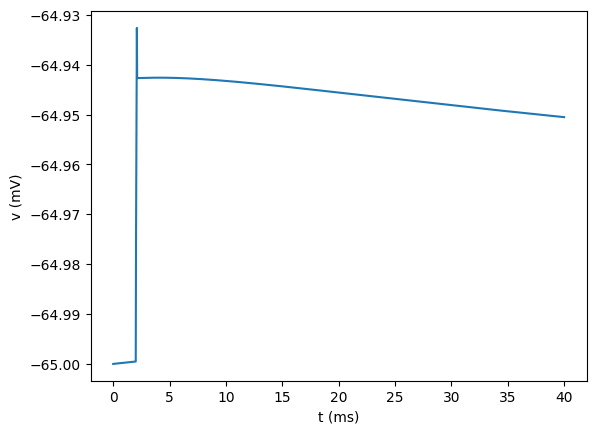

In [28]:
plt.figure()
plt.plot(t, v)
plt.xlabel("t (ms)")
plt.ylabel("v (mV)")
plt.show()


In [29]:
# saving and loading results
import csv
with open("data.csv", "w") as f:
    csv.writer(f).writerows(zip(t,v))

In [56]:
#reading
with open("data.csv") as f:
    reader = csv.reader(f)
    tnew, vnew = zip(*[[float(val) for val in row] for row in reader if row])

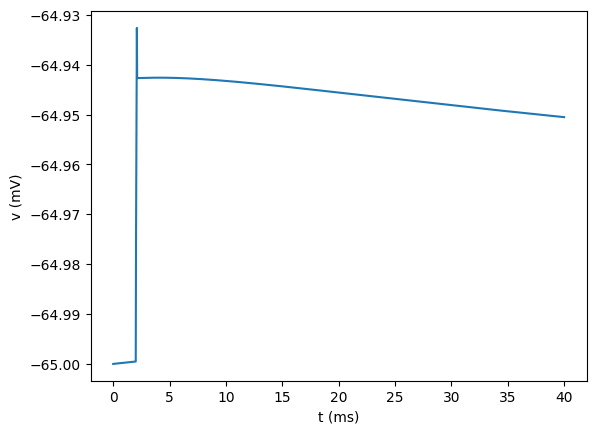

In [57]:
plt.figure()
plt.plot(tnew, vnew)
plt.xlabel("t (ms)")
plt.ylabel("v (mV)")
plt.show()


In [58]:
#writing in json
import json
with open("data.json", "w") as f:
    json.dump({"t": list(t), "v": list(v)}, f, indent=4)

In [59]:
#reading in json
with open("data.json") as f:
    data = json.load(f)
tnew = data["t"]
vnew = data["v"]